<a href="https://colab.research.google.com/github/serlysetyani/Forensic-Digital_Duplication-Region/blob/main/Forensic_SIFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

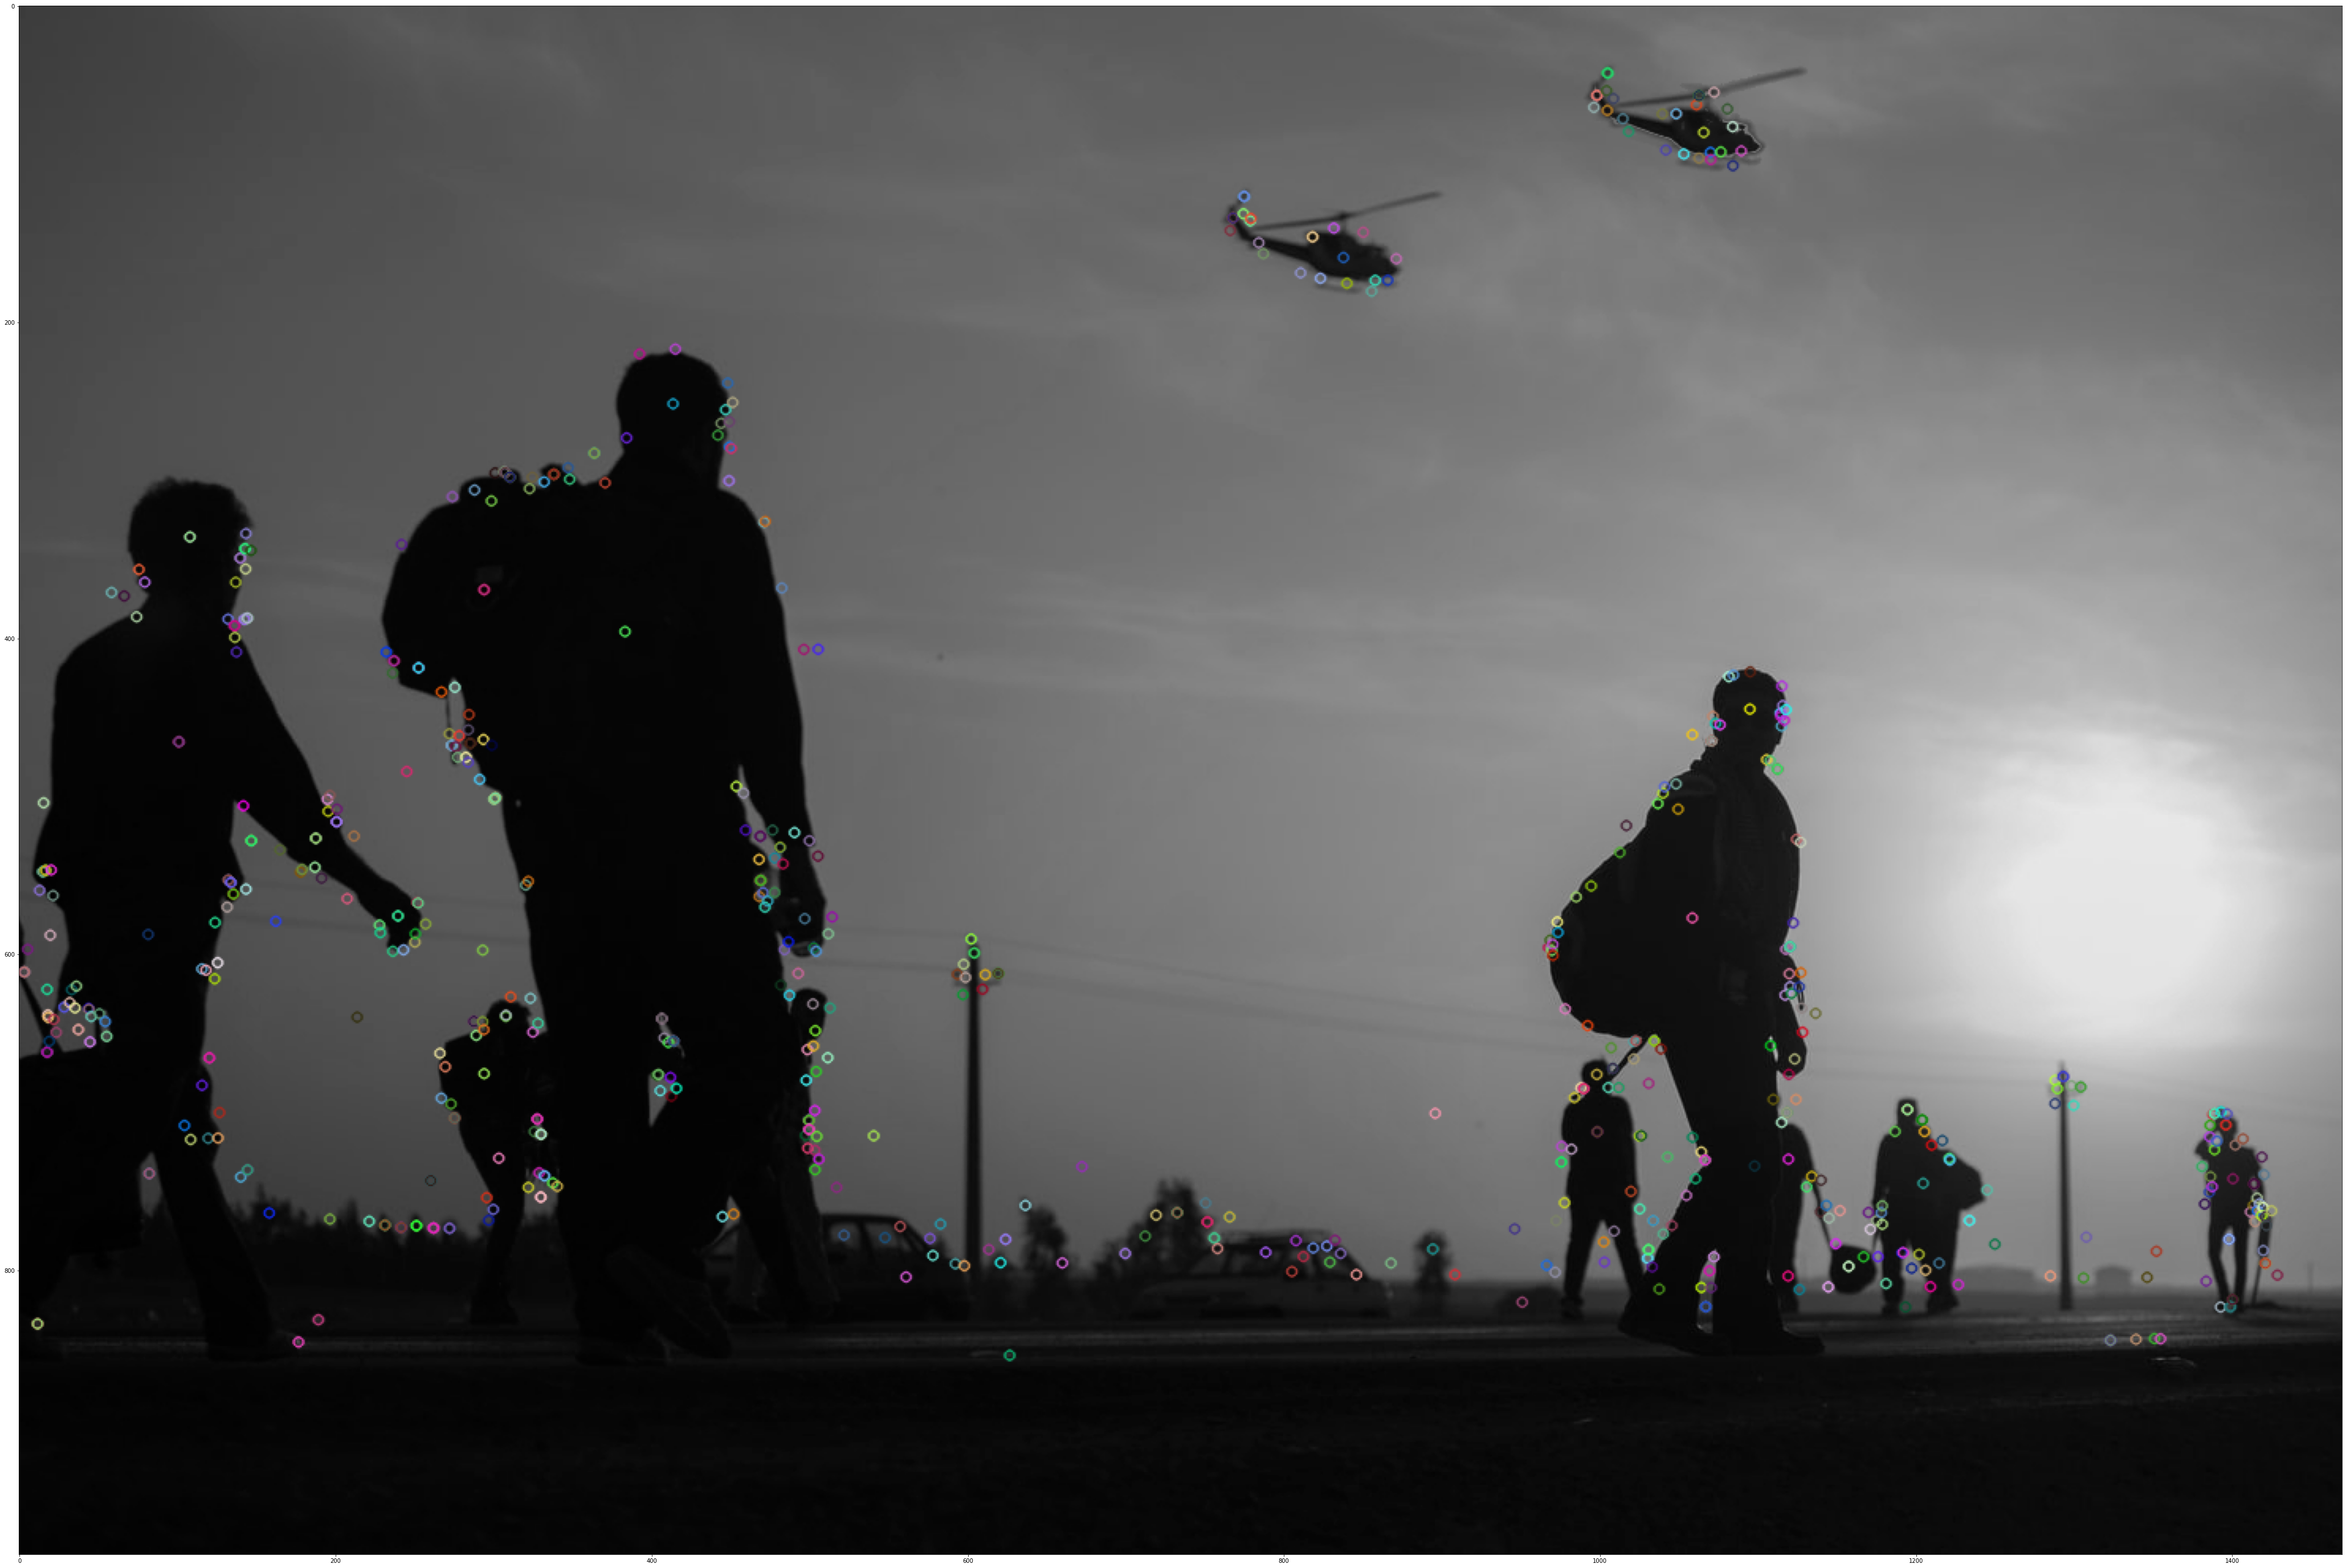

In [2]:
# Finding Image Keypoints using SIFT
import sys
sys.path.append('/usr/local/lib/python2.7/site-packages')
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#reading image
img1 = cv2.imread('photo-1559736220-66fc1882555d-F2.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
plt.figure(figsize = (100,50))
plt.imshow(img_1)

In [5]:
# Keypoints matching
print("Banyak keypoints dari gambar adalah:", len(keypoints_1), "\n")

print("Sample keypoints")
for i in range(10):
    print(f"Keypoints ke-{i+1}:",keypoints_1[i].pt)

Banyak keypoints dari gambar adalah: 680 

Sample keypoints
Keypoints ke-1: (2.9573214054107666, 611.01611328125)
Keypoints ke-2: (2.9573214054107666, 611.01611328125)
Keypoints ke-3: (5.147054195404053, 596.638671875)
Keypoints ke-4: (11.385068893432617, 833.62890625)
Keypoints ke-5: (11.385068893432617, 833.62890625)
Keypoints ke-6: (12.660050392150879, 559.2828369140625)
Keypoints ke-7: (14.762115478515625, 547.4863891601562)
Keypoints ke-8: (14.762115478515625, 547.4863891601562)
Keypoints ke-9: (15.203445434570312, 503.9613342285156)
Keypoints ke-10: (16.528287887573242, 546.708984375)


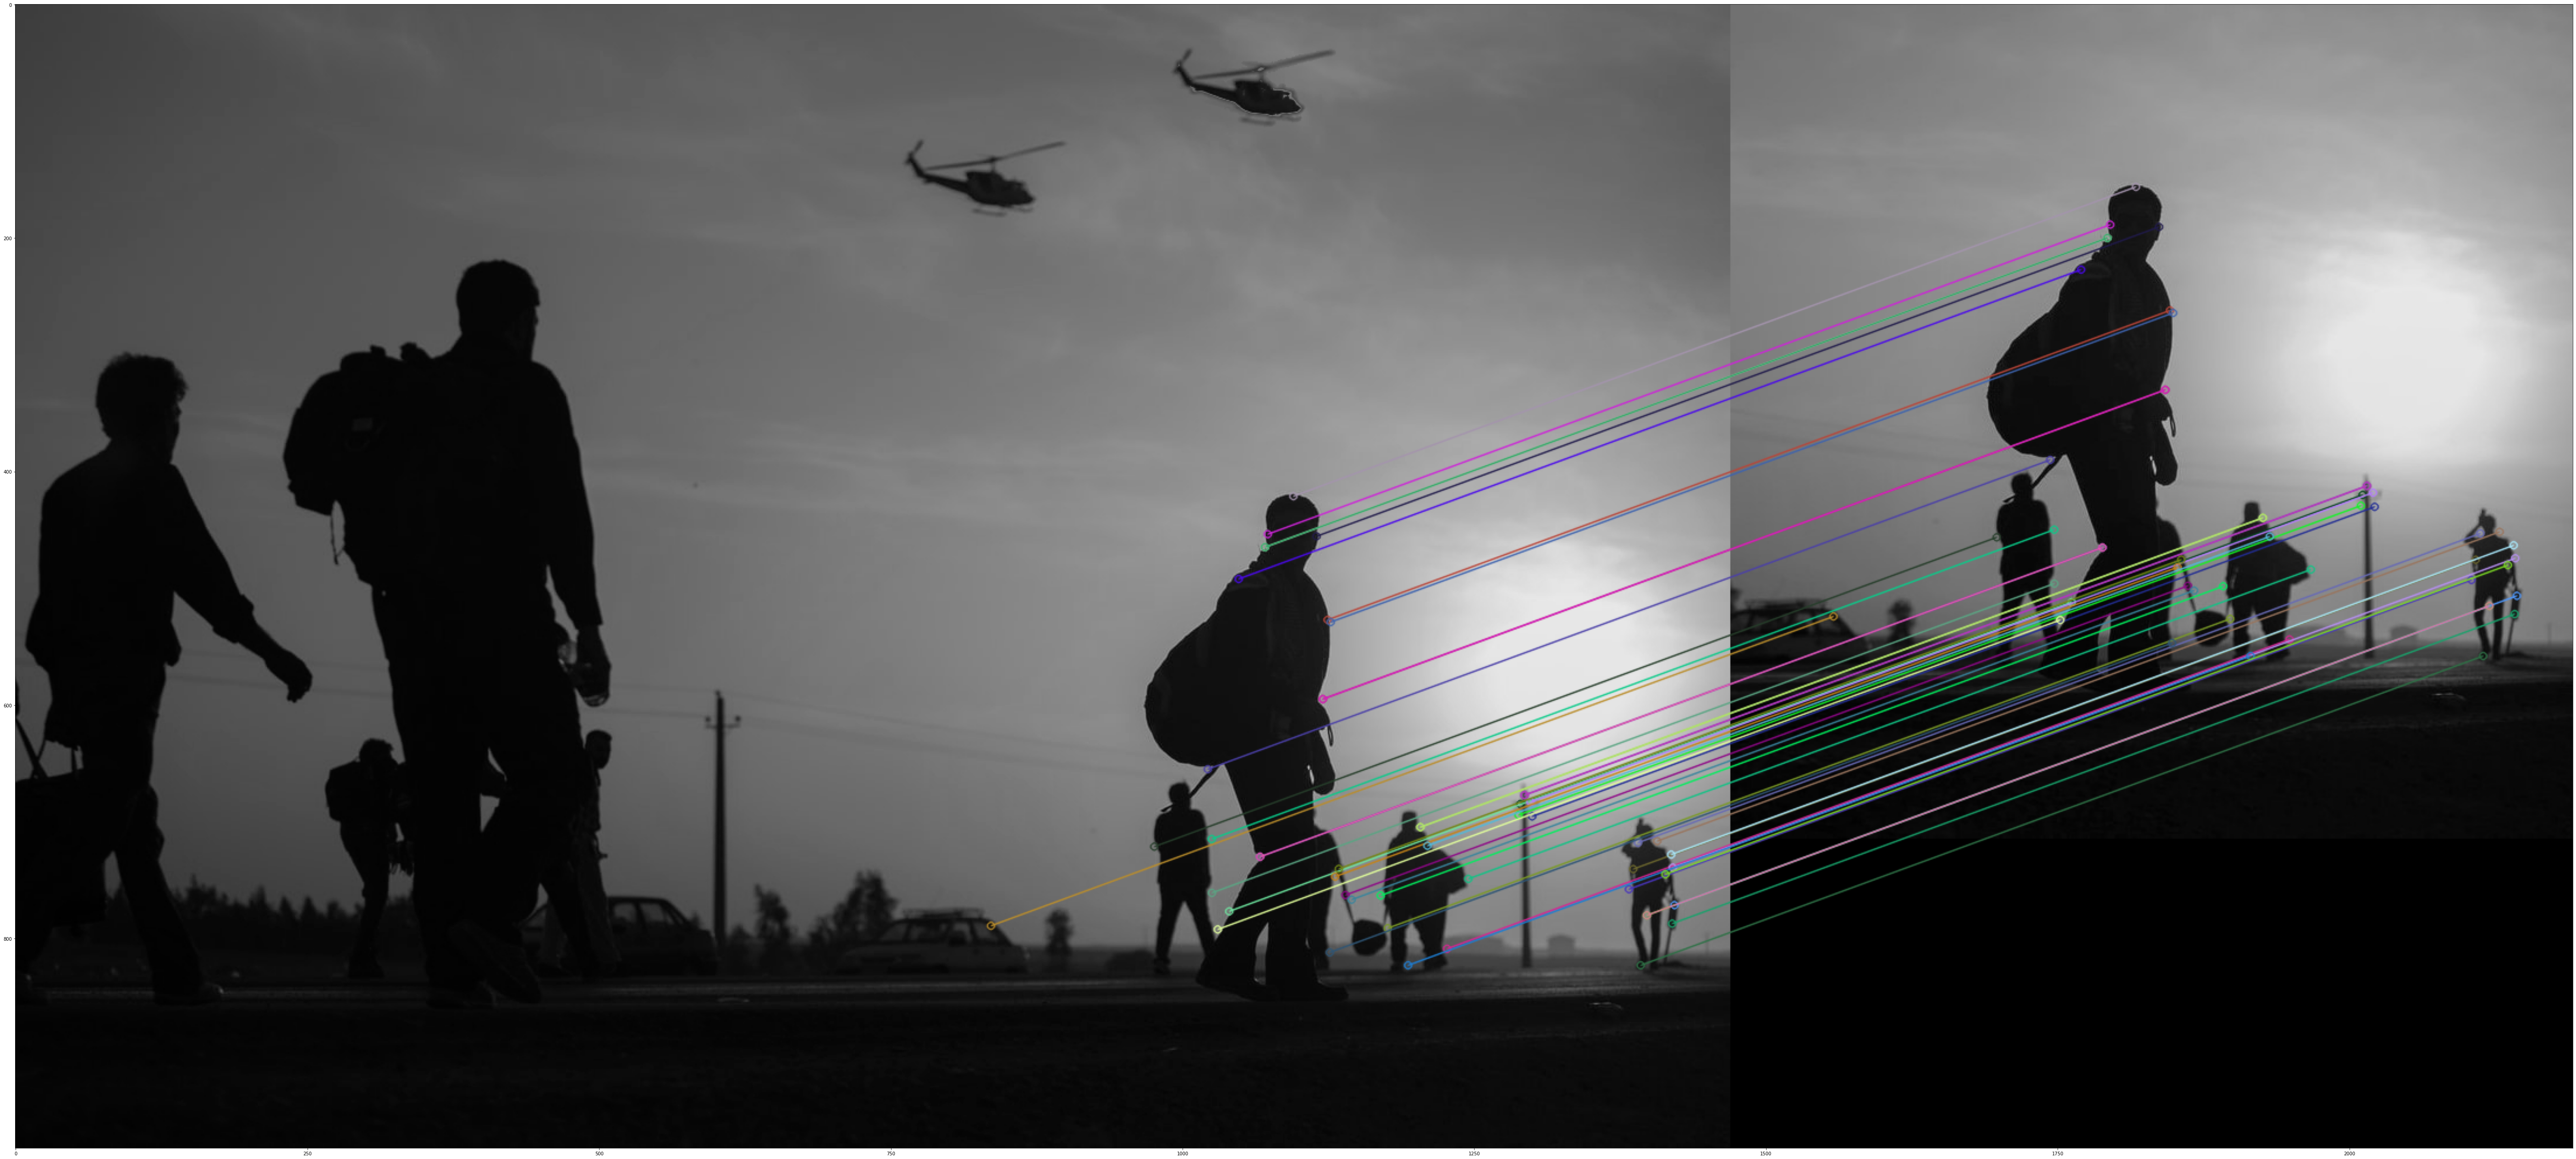

(<matplotlib.image.AxesImage at 0x1d6b83c4220>, None)

In [4]:
img1 = cv2.imread('photo-1559736220-66fc1882555d-F2.jpg')  
img2 = cv2.imread('photo-1559736220-66fc1882555d-F2-Crop.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.figure(figsize = (100,50))
plt.imshow(img3),plt.show()